# Assignment 1
## Linear Regression

Goals
1. Demonstrate whether or not cancer incidence and mortality are correlated with socioeconomic status.
2. Provide both quantitative and visual evidence that the nonprofit can take and use to further their mission.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.cbook import boxplot_stats


In [2]:
import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")

import seaborn as sns
sns.set(rc={"figure.dpi":150, 'savefig.dpi':150})
sns.set_context('notebook')
sns.set_style("ticks")
import warnings
warnings.filterwarnings('ignore')

# Loading datasets


In [4]:
df = pd.read_excel("merged_data.xlsx", index_col=0)

In [5]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

The columns to be processed are:

| Feature           | Definition                                    |
|-------------------|-----------------------------------------------|
| State             | .                                             |
| AreaName          | .                                             |
| All_Poverty       | Both M and F reported below poverty line      |
| M_Poverty         | M below poverty                               |
| F_Poverty         | F below poverty                               |
| FIPS              | State+CountyFIPS                              |
| Med_Income        | Income All ethnicites                         |
| M_With            | Males with health insurance                   |
| M_Without         | Males without health insurance                |
| F_With            | Females with health insurance                 |
| F_Without         | Females without health insurance              |
| All_With          | M and F with health insurance                 |
| All_Without       | M and F without health insurance              |
| Incidence_Rate    | Lung cancer incidence rate (per 100K) '*' <16 |
| Avg_Ann_Incidence | Average lung cancer incidence rate            |
| Mortality_Rate    | Lung cancer mortality rate (per 100K) '*' <16 |
| Avg_Ann_Deaths    | Average lung cancer mortalities               |
| Recent Trend      | Recent trend of incidence                     |


In [6]:
df.shape

(3134, 25)

## Data Cleaning

### Drop unnecessary columns

The F fips_x, fips_y columns are not necessary for us.

In [7]:
df.drop(["fips_x","fips_y"], axis = 1, inplace = True)

In [8]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

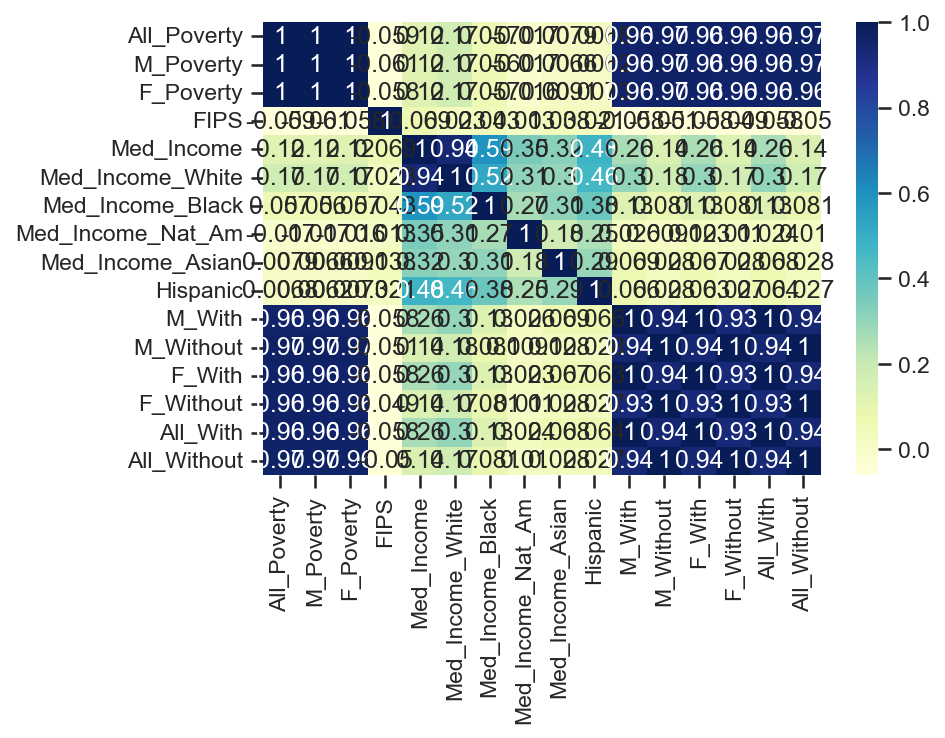

In [9]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [10]:
for col in df.columns:
    print((col, sum(df[col].isnull())))

('State', 0)
('AreaName', 0)
('All_Poverty', 0)
('M_Poverty', 0)
('F_Poverty', 0)
('FIPS', 0)
('Med_Income', 1)
('Med_Income_White', 2)
('Med_Income_Black', 1210)
('Med_Income_Nat_Am', 1660)
('Med_Income_Asian', 1757)
('Hispanic', 681)
('M_With', 0)
('M_Without', 0)
('F_With', 0)
('F_Without', 0)
('All_With', 0)
('All_Without', 0)
('Incidence_Rate', 0)
('Avg_Ann_Incidence', 0)
('recent_trend', 0)
('Mortality_Rate', 0)
('Avg_Ann_Deaths', 0)


Since Ethnicity data is incomplete and there is many empty data

In [11]:
df.drop(['Med_Income_White', 'Med_Income_Black', 'Med_Income_Nat_Am',
             'Med_Income_Asian', 'Hispanic'], axis=1, inplace=True)

### Cancer Incidence and Cancer Deaths Columns Data Cleaning

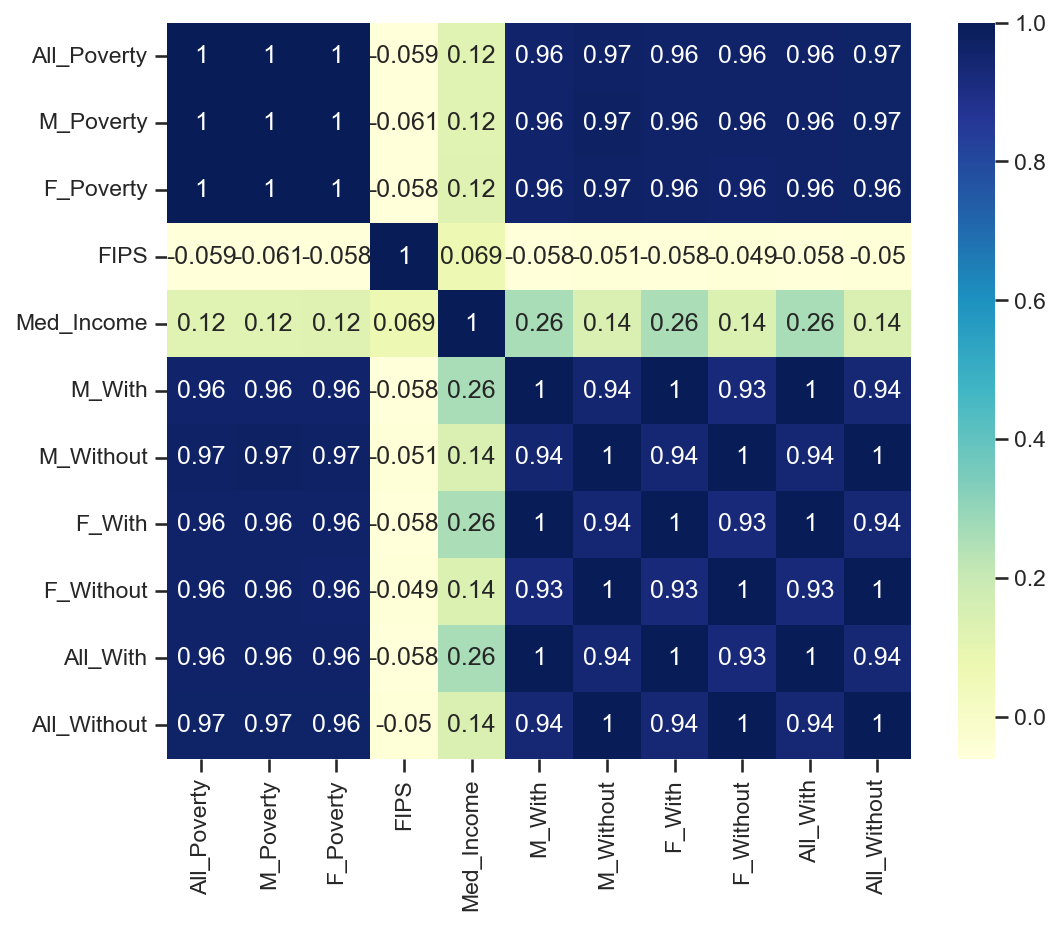

In [12]:
plt.figure(figsize=(8,6.5))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True )
plt.savefig("Co-relation Heat_map.png") 

In [13]:
def value_counts_func(column_name):
    print(df[column_name].value_counts().sort_values(),"\n")
    
value_counts_func('Incidence_Rate')
value_counts_func('Mortality_Rate')
value_counts_func('Avg_Ann_Incidence')
value_counts_func('Avg_Ann_Deaths')

23.7       1
106.9      1
109        1
120.6      1
94.5       1
        ... 
66.3      12
__        17
65.2      19
_        192
*        211
Name: Incidence_Rate, Length: 813, dtype: int64 

83.6      1
80.3      1
23.6      1
78.7      1
80.8      1
       ... 
54.4     14
56.3     15
51.8     17
48.3     19
*       325
Name: Mortality_Rate, Length: 618, dtype: int64 

658             1
301             1
736             1
673             1
150             1
             ... 
7              73
9              79
6              88
_             192
3 or fewer    211
Name: Avg_Ann_Incidence, Length: 362, dtype: int64 

170      1
83       1
327      1
862      1
340      1
      ... 
8       93
9       98
4      113
5      120
*      325
Name: Avg_Ann_Deaths, Length: 306, dtype: int64 



In [14]:
df.loc[df.Incidence_Rate=='*', 'State'].value_counts()

TX    47
NE    31
SD    24
ND    22
CO    16
MT    15
UT    10
ID    10
AK     8
NM     6
OK     4
GA     4
OR     3
CA     2
VA     2
WY     2
MS     1
MO     1
MI     1
HI     1
WA     1
Name: State, dtype: int64

In [15]:
df.loc[df.Incidence_Rate=='*', 'Mortality_Rate'].value_counts()

*       206
76.8      1
66.1      1
64.7      1
89.1      1
42        1
Name: Mortality_Rate, dtype: int64

Columns `Incidence_Rate`, `Avg_Ann_Incidence`, `recent_trend`, `Mortality_Rate`, `Avg_Ann_Deaths` have `*` data in it. 

As, there are many columns marked with "*", we assume that the "*" are cery negligible in comparision to others. And the "*" has no significance.
Also, similarly there are * in Incidence_Rate

In columns `Mortality_Rate`, drop `*`

In [16]:
df = df[df.Mortality_Rate != '*']

The `Incidence_Rate` column has few values with ` #` attached in the number, which is an incomplete data , so lets drop the data.

In [17]:
for x in df['Incidence_Rate'].index:
    if " #" in str(df.loc[x, "Incidence_Rate"]):
         df.loc[x, "Incidence_Rate"]= '*'

In [18]:
df = df[df.Incidence_Rate != '*' ]

In [19]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'M_With', 'M_Without', 'F_With', 'F_Without', 'All_With',
       'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

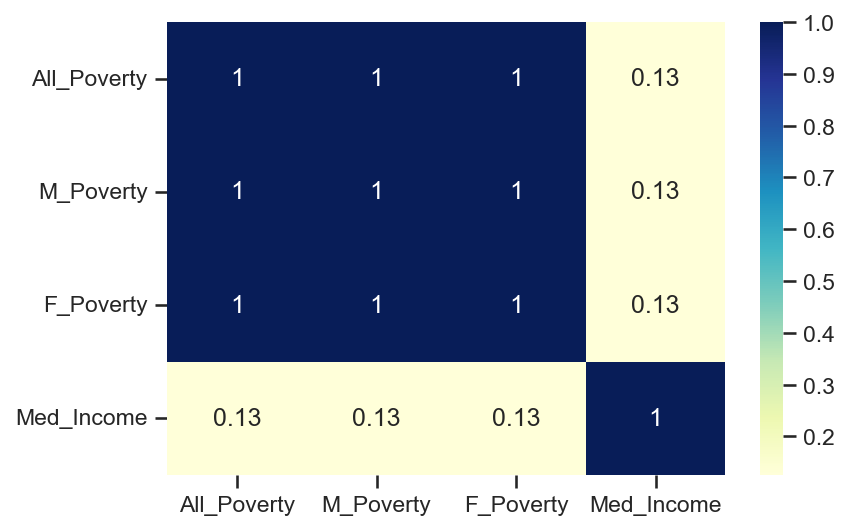

In [20]:
dataplot = sns.heatmap(df[['All_Poverty', 'M_Poverty', 'F_Poverty', 'Med_Income']].corr(), cmap="YlGnBu", annot=True)

As we can see, 'All_Poverty_PC', 'M_Poverty_PC'& 'F_Poverty' are perfectly co-related. Hence, we can drop M_poverty and F_poverty and keep All_poverty to represent the poverty information in our model.

In [21]:
df.drop(['M_Poverty', 'F_Poverty'], axis=1, inplace=True)

In [22]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

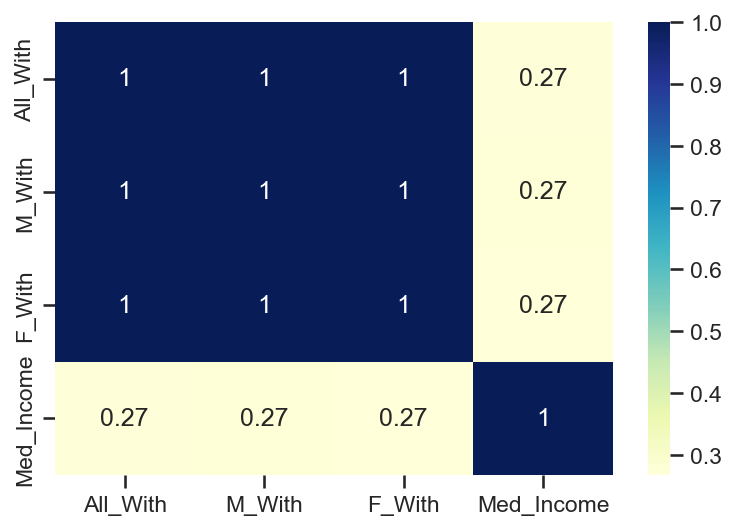

In [23]:
dataplot = sns.heatmap(df[['All_With', 'M_With', 'F_With', 'Med_Income']].corr(), cmap="YlGnBu", annot=True)

As we can see, 'All_With', 'M_With', 'F_With' are perfectly co-related. Hence, we can drop M_with and F_with and keep All_with to represent the poverty information in our model.


In [24]:
df.drop(['M_With', 'F_With'], axis=1, inplace=True)

In [25]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'M_Without',
       'F_Without', 'All_With', 'All_Without', 'Incidence_Rate',
       'Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate',
       'Avg_Ann_Deaths'],
      dtype='object')

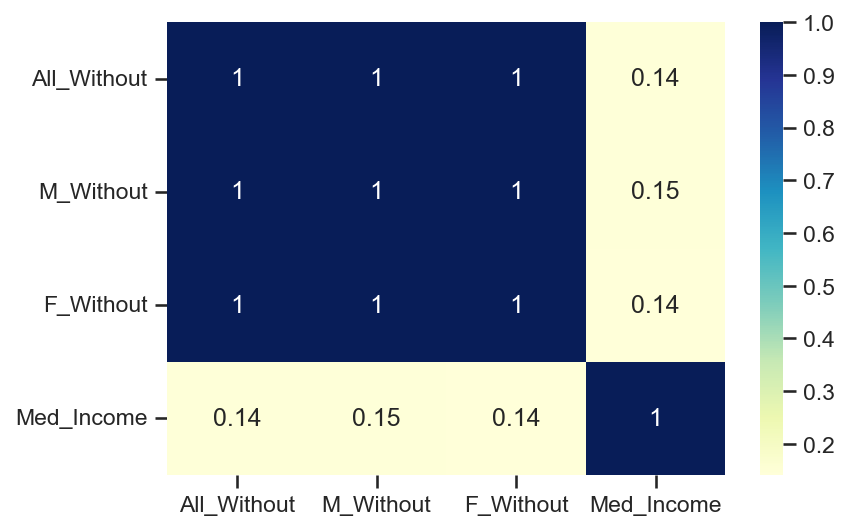

In [26]:
dataplot = sns.heatmap(df[['All_Without', 'M_Without', 'F_Without', 'Med_Income']].corr(), cmap="YlGnBu", annot=True)

As we can see, 'All_Without', 'M_Without', 'F_Without' are perfectly co-related. Hence, we can drop M_without and F_without and keep All_with to represent the poverty information in our model.

In [27]:
df.drop(['M_Without', 'F_Without'], axis=1, inplace=True)

In [28]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'All_With',
       'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

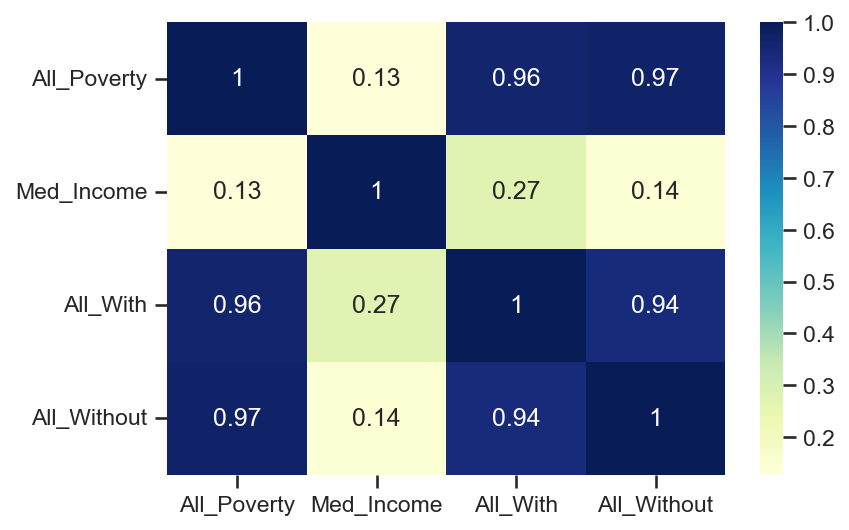

In [29]:
cols = ['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Incidence_Rate','Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate', 'Avg_Ann_Deaths']
dataplot = sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)

As we can se there are data in "Incidence_Rate" with _ and __. lets replace it with np.NaN

In [30]:
df.loc[df['Incidence_Rate'].isin(['_','__',]), 'Incidence_Rate']=np.NaN

In [31]:
df['Incidence_Rate'] = df['Incidence_Rate'].astype(float)

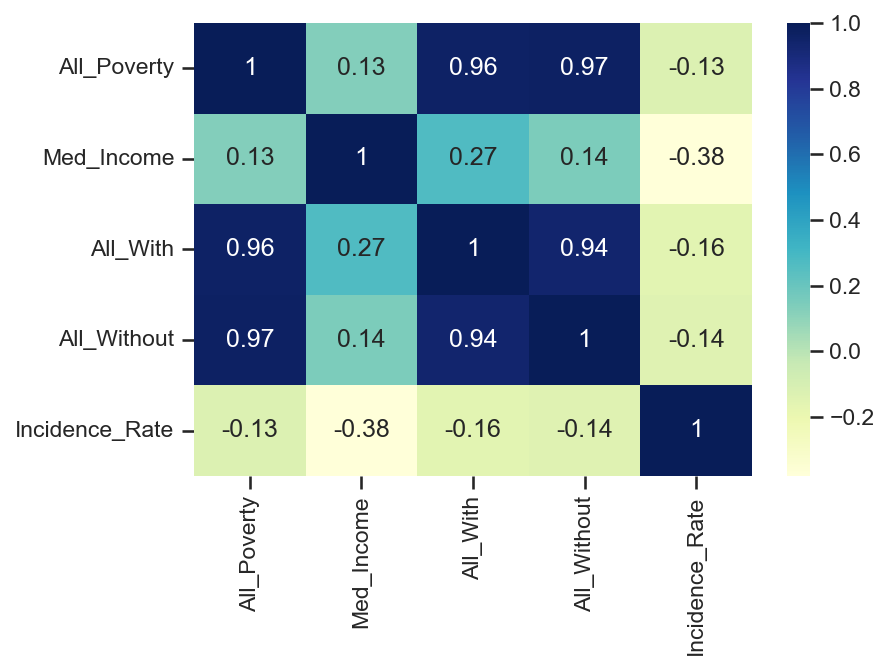

In [32]:
cols = ['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Incidence_Rate','Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate', 'Avg_Ann_Deaths']
dataplot = sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)

In [33]:
df['Mortality_Rate'] = df['Mortality_Rate'].astype(float)

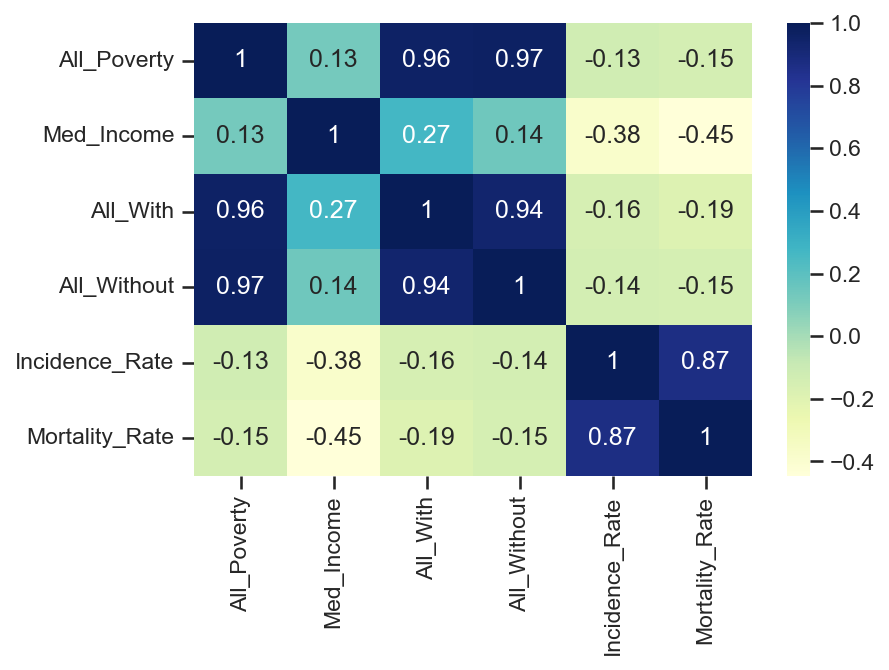

In [34]:
cols = ['All_Poverty', 'Med_Income', 'All_With', 'All_Without', 'Incidence_Rate','Avg_Ann_Incidence', 'recent_trend', 'Mortality_Rate', 'Avg_Ann_Deaths']
dataplot = sns.heatmap(df[cols].corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:xlabel='Avg_Ann_Incidence', ylabel='Count'>

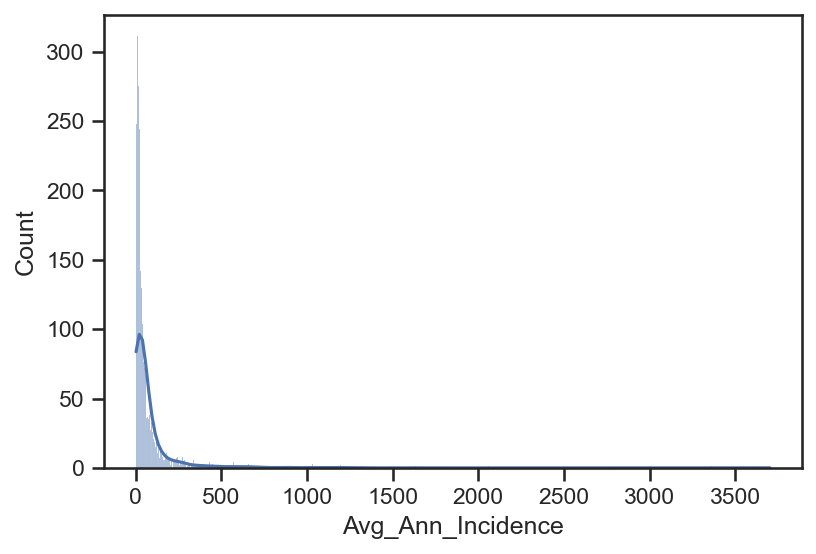

In [35]:
sns.histplot(df.loc[df['Avg_Ann_Incidence'].astype(str).str.isnumeric(),'Avg_Ann_Incidence'], binwidth=5, kde=True)

The column `Avg_Ann_Incidence` has many rows empty, we fill it with median value.

In [36]:
df.loc[(df['Avg_Ann_Incidence'].isin(["3 or fewer","_","*","__"]), 'Avg_Ann_Incidence')]=np.NaN

In [37]:
df['Avg_Ann_Incidence'] = df['Avg_Ann_Incidence'].astype(float)

In [38]:
df['Avg_Ann_Deaths'].value_counts(ascending=True)

170      1
365      1
467      1
142      1
204      1
      ... 
7       85
8       91
9       96
4      111
5      120
Name: Avg_Ann_Deaths, Length: 304, dtype: int64

In [39]:
df.loc[(df['Avg_Ann_Deaths'].isin(["_","*","__"]), 'Avg_Ann_Deaths')]=np.NaN
df['Avg_Ann_Deaths'] = df['Avg_Ann_Deaths'].astype(float)

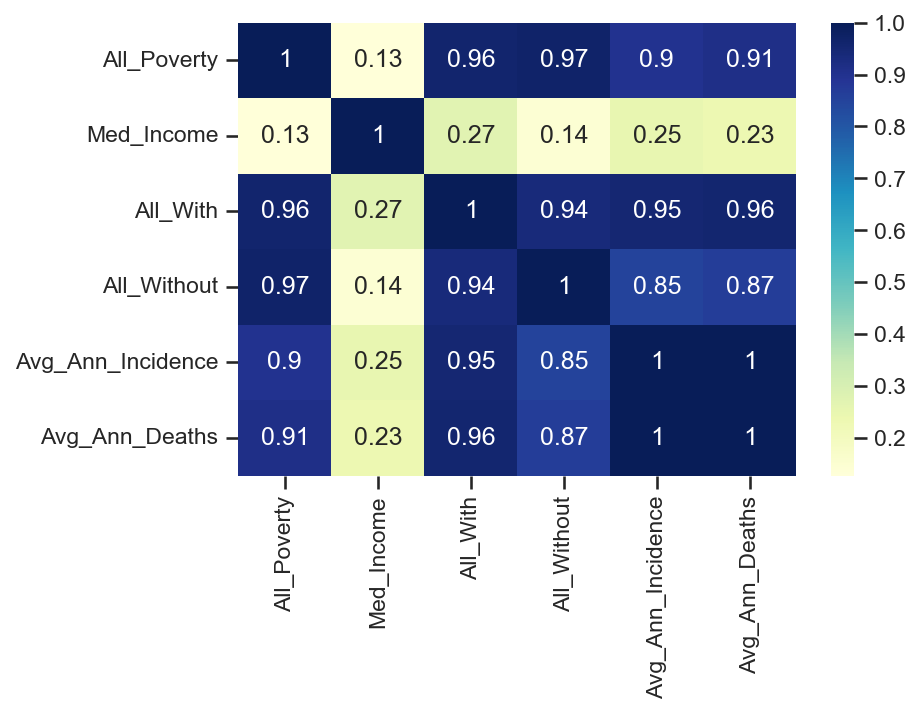

In [40]:
dataplot = sns.heatmap(df[['All_Poverty','Med_Income','All_With','All_Without','Avg_Ann_Incidence','Avg_Ann_Deaths']].corr(), cmap="YlGnBu", annot=True)

In [41]:
df.dropna(subset=['Avg_Ann_Deaths','Avg_Ann_Incidence'], inplace=True)
df.dropna(subset=['Incidence_Rate', 'Mortality_Rate'], inplace=True)
print(len(df))

2562


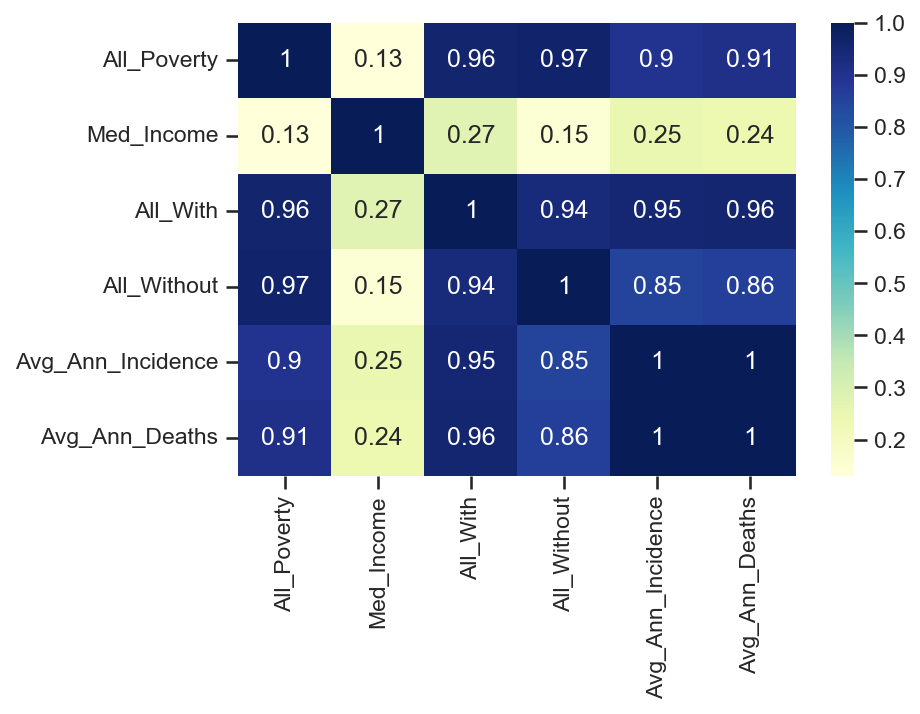

In [42]:
dataplot = sns.heatmap(df[['All_Poverty','Med_Income','All_With','All_Without','Avg_Ann_Incidence','Avg_Ann_Deaths']].corr(), cmap="YlGnBu", annot=True)

In [43]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'FIPS', 'Med_Income', 'All_With',
       'All_Without', 'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

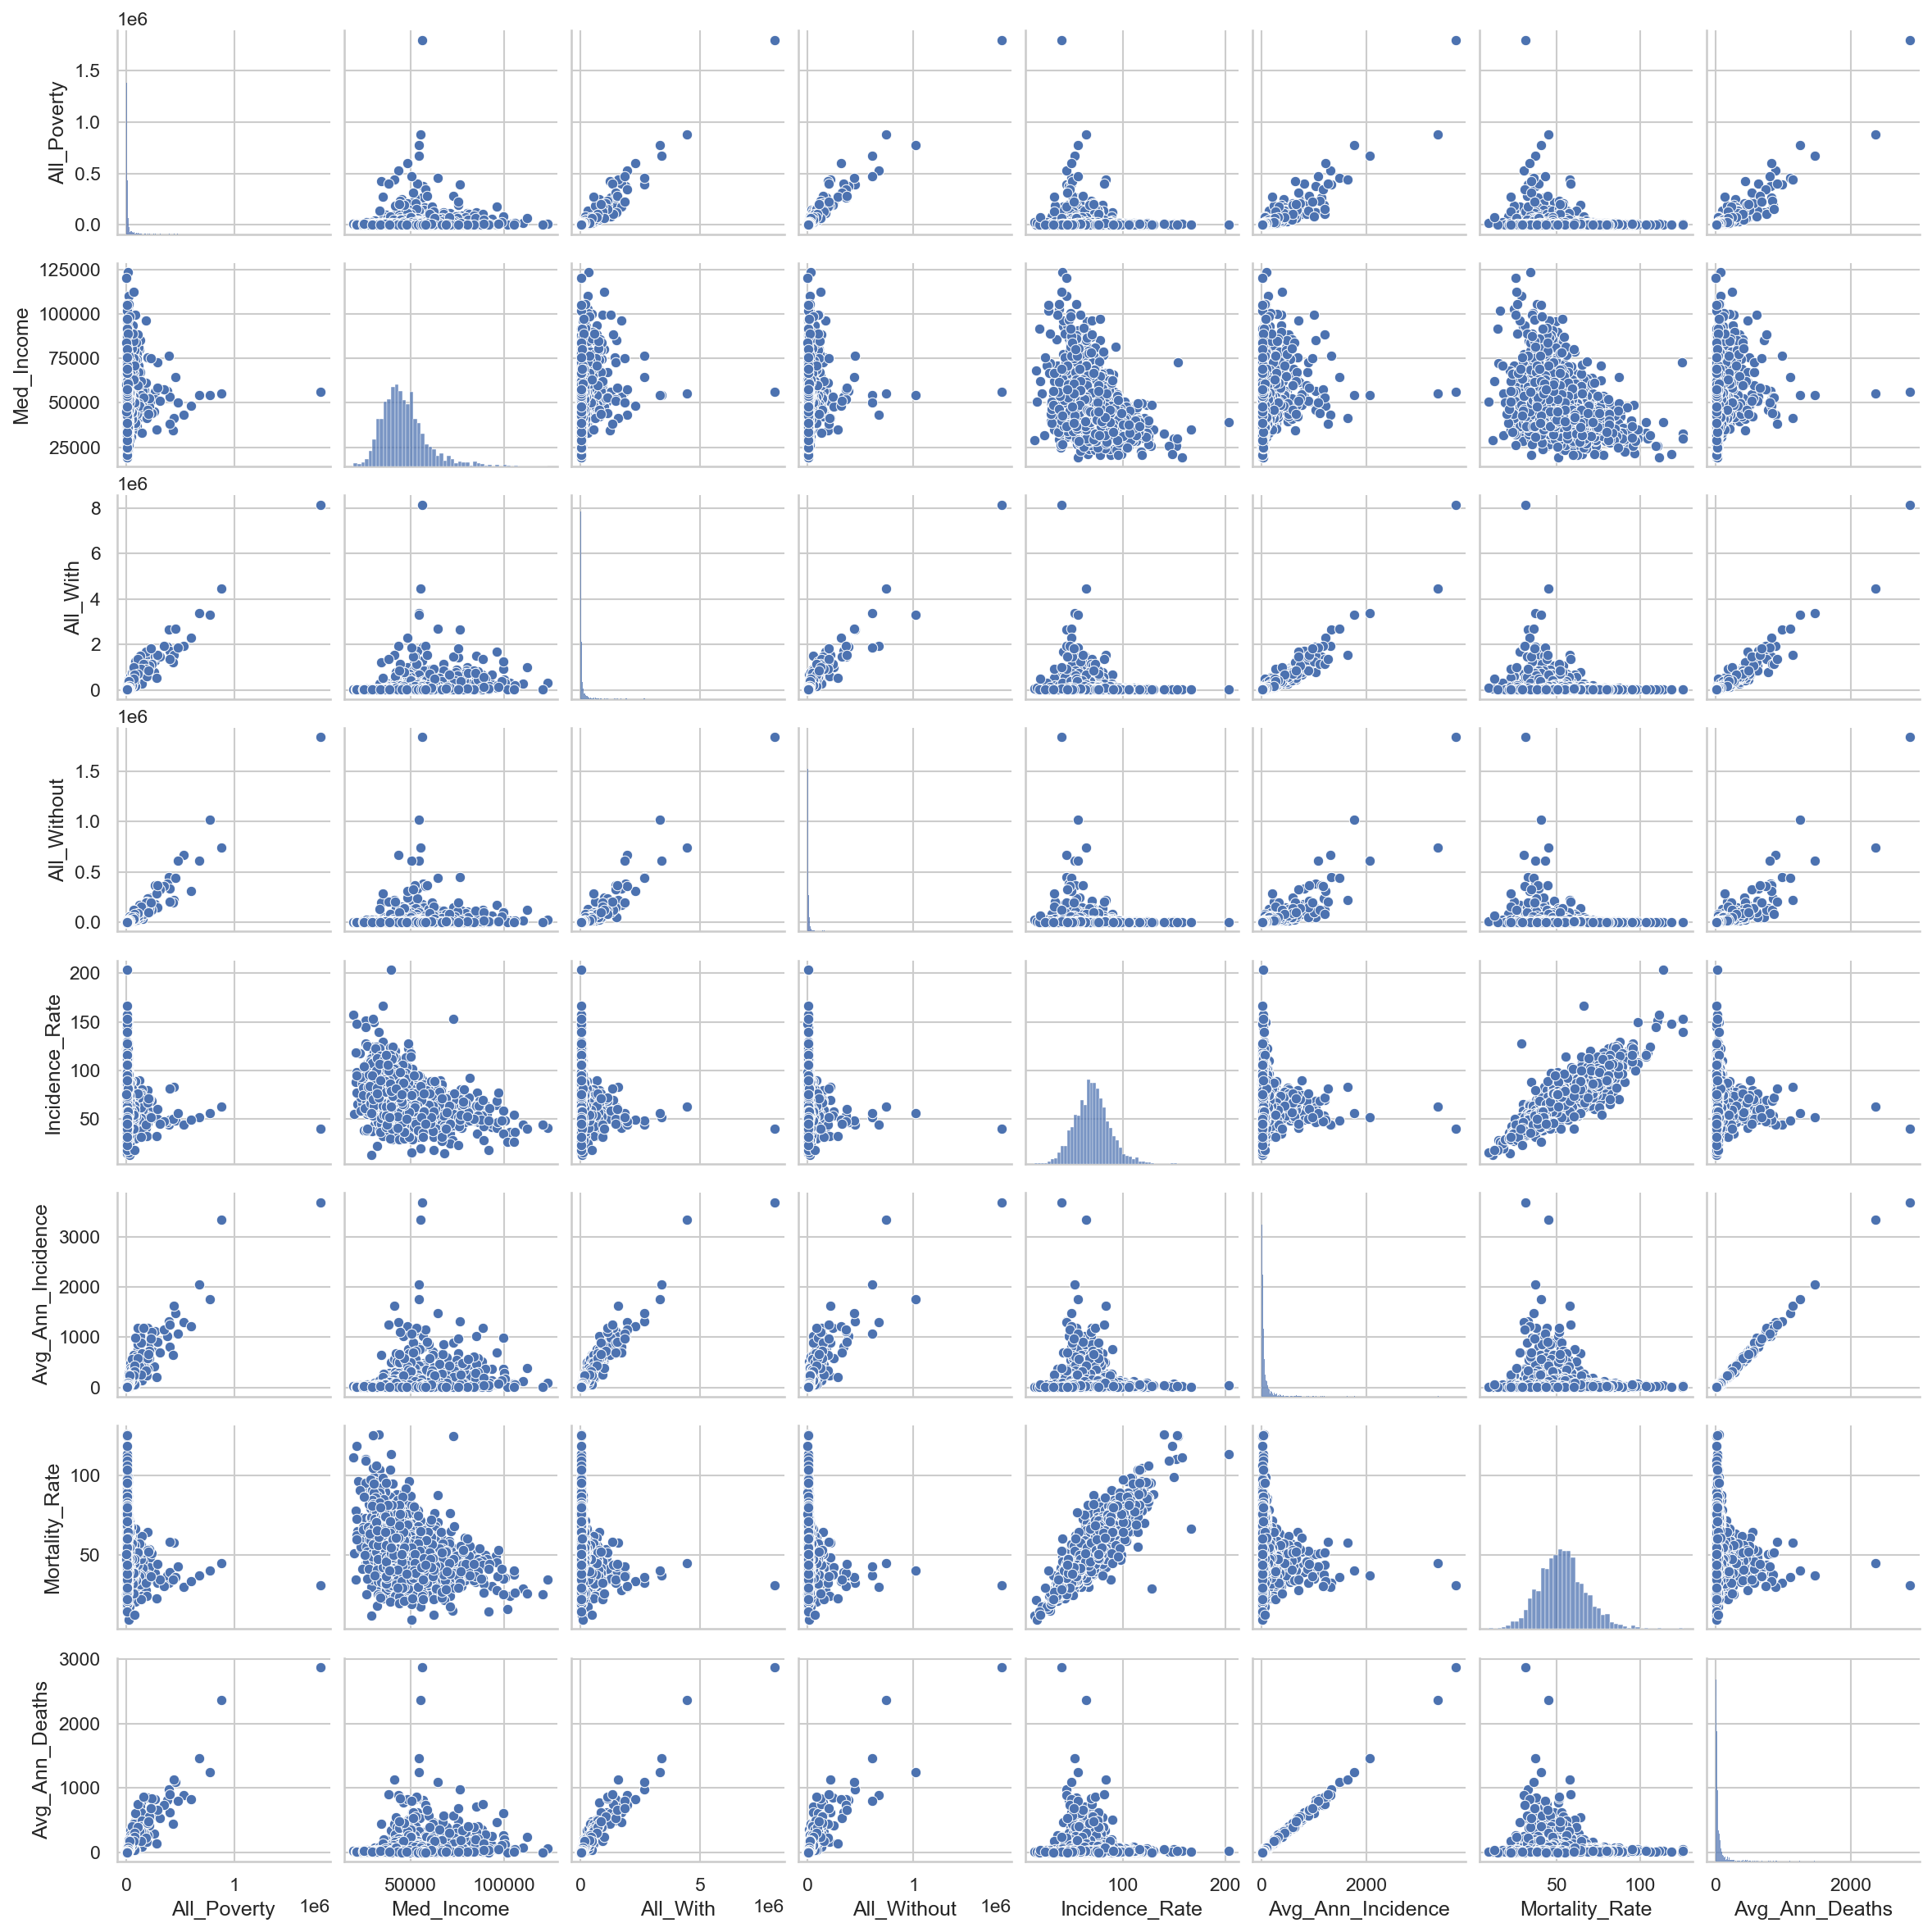

In [44]:
cols = ['All_Poverty', 'Med_Income', 'All_With', 'All_Without',
                'Incidence_Rate',  'Avg_Ann_Incidence',
       'Mortality_Rate', 'Avg_Ann_Deaths']
sns.set(style='whitegrid', context='notebook')
sns.pairplot(df[cols], size=2)
# plt.show()

In [45]:
cols = ['All_Poverty', 'Med_Income', 'All_With', 'All_Without',
                'Incidence_Rate',  'Avg_Ann_Incidence',
       'Mortality_Rate', 'Avg_Ann_Deaths']

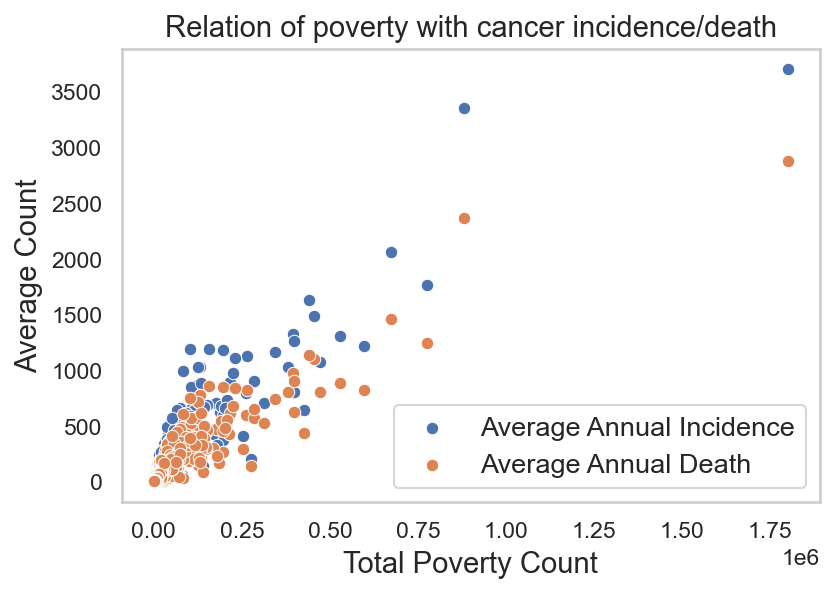

<Figure size 900x600 with 0 Axes>

In [46]:
ax = sns.scatterplot(x ='All_Poverty', y = 'Avg_Ann_Incidence', data=df, alpha=1.0)
ax = sns.scatterplot(x ='All_Poverty', y = 'Avg_Ann_Deaths', data=df, alpha=1.0)

plt.title('Relation of poverty with cancer incidence/death', fontsize=14)
plt.xlabel('Total Poverty Count', fontsize=14)
plt.ylabel('Average Count', fontsize=14)
plt.legend(labels=["Average Annual Incidence","Average Annual Death"], fontsize=13)
plt.grid(None)
plt.show()
plt.savefig("Poverty vs Cancer.jpg") 


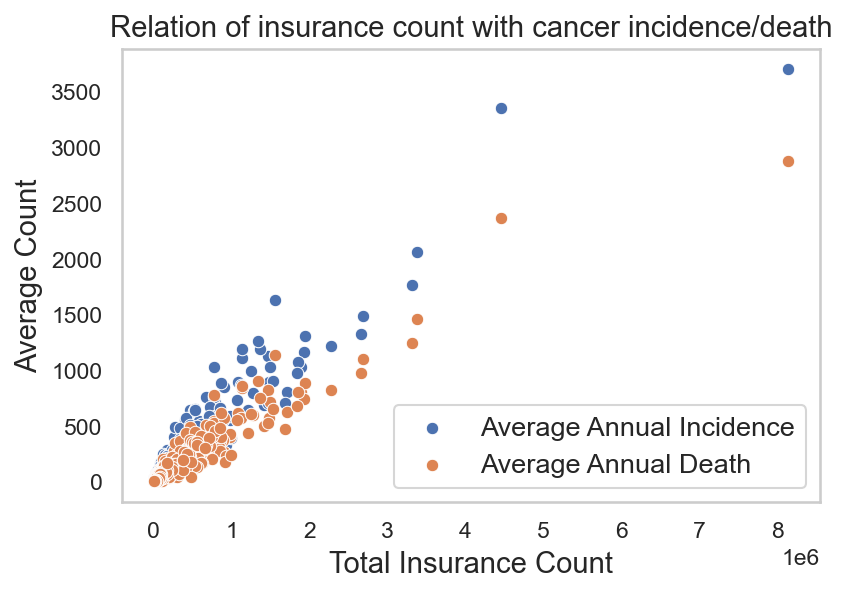

<Figure size 900x600 with 0 Axes>

In [47]:
ax = sns.scatterplot(x ='All_With', y = 'Avg_Ann_Incidence', data=df, alpha=1.0)
ax = sns.scatterplot(x ='All_With', y = 'Avg_Ann_Deaths', data=df, alpha=1.0)

plt.title('Relation of insurance count with cancer incidence/death', fontsize=14)
plt.xlabel('Total Insurance Count', fontsize=14)
plt.ylabel('Average Count', fontsize=14)
plt.legend(labels=["Average Annual Incidence","Average Annual Death"], fontsize=13)
plt.grid(None)
plt.show()
plt.savefig("Log_of_total_poverty_count_vs_cancer_incidence_death.jpg") 


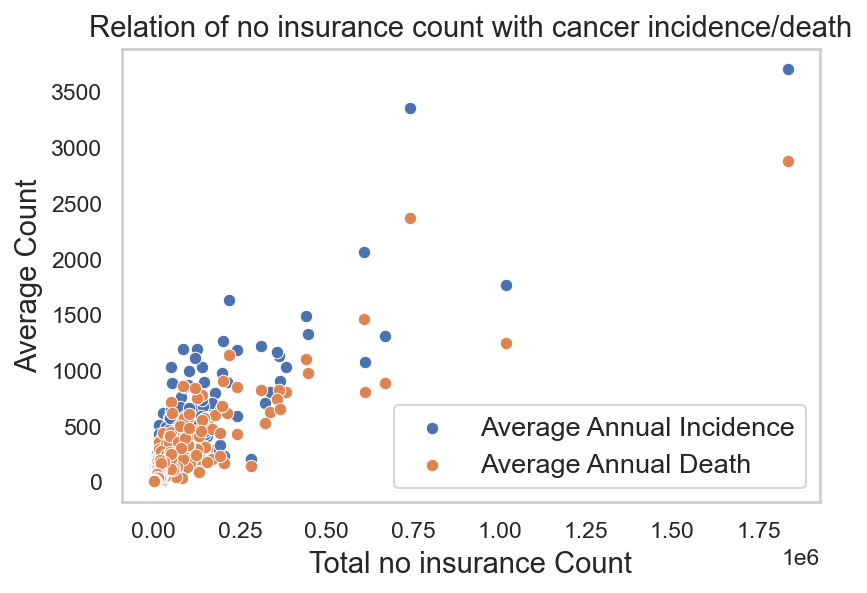

In [48]:
ax = sns.scatterplot(x ='All_Without', y = 'Avg_Ann_Incidence', data=df, alpha=1.0)
ax = sns.scatterplot(x ='All_Without', y = 'Avg_Ann_Deaths', data=df, alpha=1.0)

plt.title('Relation of no insurance count with cancer incidence/death', fontsize=14)
plt.xlabel('Total no insurance Count', fontsize=14)
plt.ylabel('Average Count', fontsize=14)
plt.legend(labels=["Average Annual Incidence","Average Annual Death"], fontsize=13)
plt.grid(None)
plt.show()
# plt.savefig("Log_of_total_poverty_count_vs_cancer_incidence_death.jpg") 


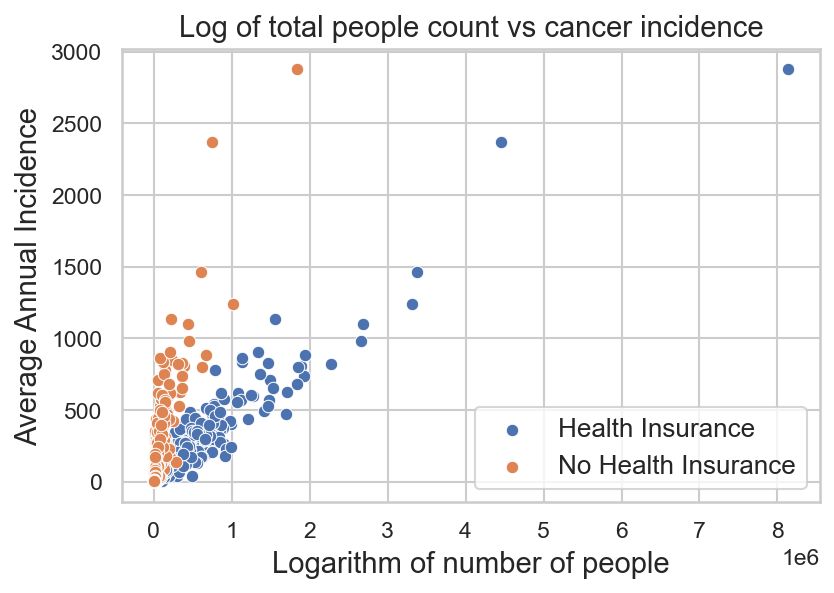

In [49]:
sns.scatterplot(x ='All_With', y = 'Avg_Ann_Deaths', data=df)
sns.scatterplot(x ='All_Without', y = 'Avg_Ann_Deaths', data=df)

plt.title('Log of total people count vs cancer incidence', fontsize=14)
# Set x-axis label
plt.xlabel('Logarithm of number of people', fontsize=14)
# Set y-axis label
plt.ylabel('Average Annual Incidence', fontsize=14)
plt.legend(labels=["Health Insurance","No Health Insurance"], fontsize=12.5)
plt.savefig("Log_of_total_people_with_without_vs_cancer_incidence.jpg") 

In [50]:
df_new = df[cols]
y = pd.to_numeric(df.Mortality_Rate).values
df_new['Constant'] = 1
df_new.reset_index(drop=True, inplace=True)

In [51]:
lr = sm.OLS(y,df_new, hasconst=True)
result = lr.fit()

In [52]:

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.602e+30
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:11:31   Log-Likelihood:                 71266.
No. Observations:                2562   AIC:                        -1.425e+05
Df Residuals:                    2553   BIC:                        -1.425e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
All_Poverty        1.128e-17   3.59e-19     31.377      0.000    1.06e-17     1.2e-17
Med_Income        -3.236e-18   4.11e-19     -7.878      0.000   -4.04e-18   -2.43e-18
All_With           -3.27e-19   8.22e-20     -3.979      0.000   -4.88e-19   -1.66e-19
All_Without       -9.412e-18   2.89e-19    -32.554      0.000   -9.98e-18   -8.85e-18
Incidence_Rate     4.762e-16   4.74e-16      1.005      0.315   -4.53e-16    1.41e-15
Avg_Ann_Incidence -5.065e-16    3.7e-16     -1.370      0.171   -1.23e-15    2.19e-16
Mortality_Rate        1.0000   6.16e-16   1.62e+15      0.000       1.000       1.000
Avg_Ann_Deaths     2.359e-16   5.26e-16      0.448      0.654   -7.96e-16    1.27e-15
Constant           3.997e-15   3.07e-14      0.130      0.896   -5.62e-14    6.42e-14
==============================================================================
Omnibus:                     1312.153   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           846694.750
Skew:                          -1.009   Prob(JB):                         0.00
Kurtosis:                      92.036   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

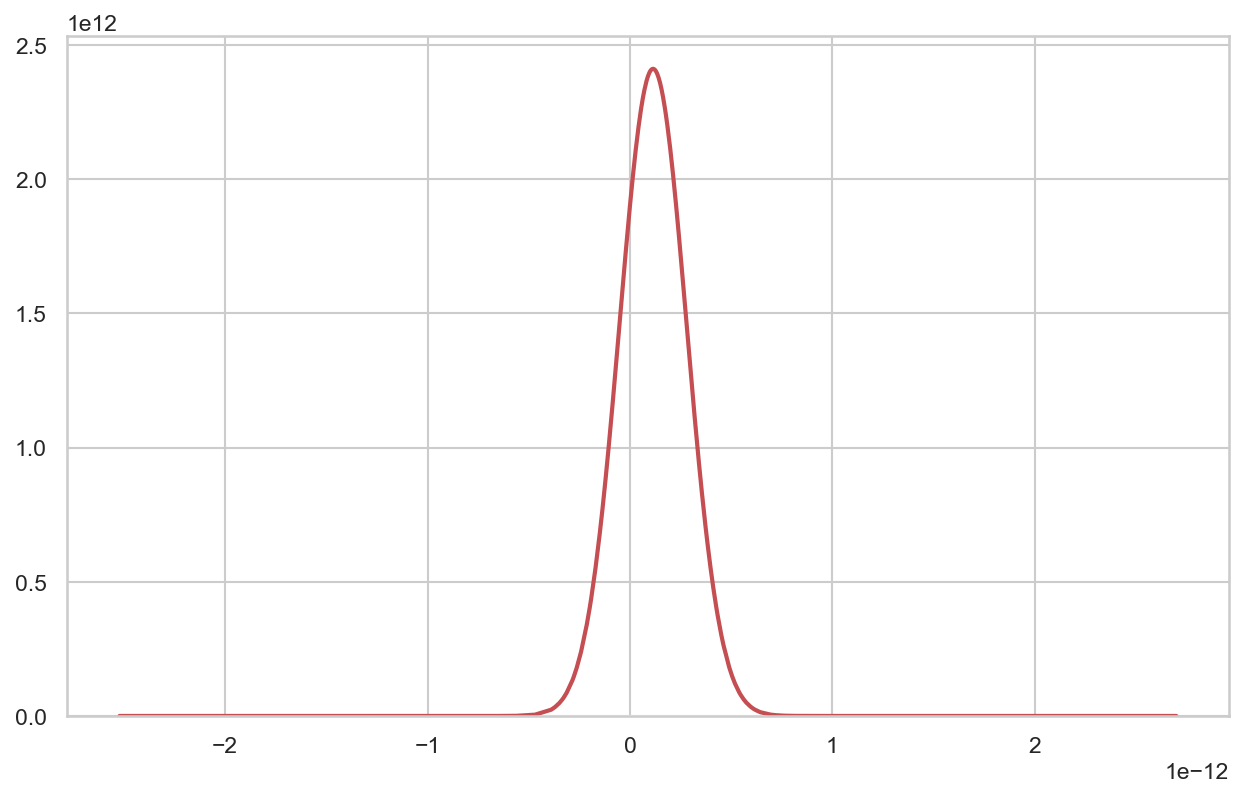

In [53]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(result.resid)
sigma = np.std(result.resid)
pdf = stats.norm.pdf(sorted(result.resid), mu, sigma)
plt.hist(result.resid) #, bins=100, normed=True)
plt.plot(sorted(result.resid), pdf, color='r', linewidth=2)
plt.show()

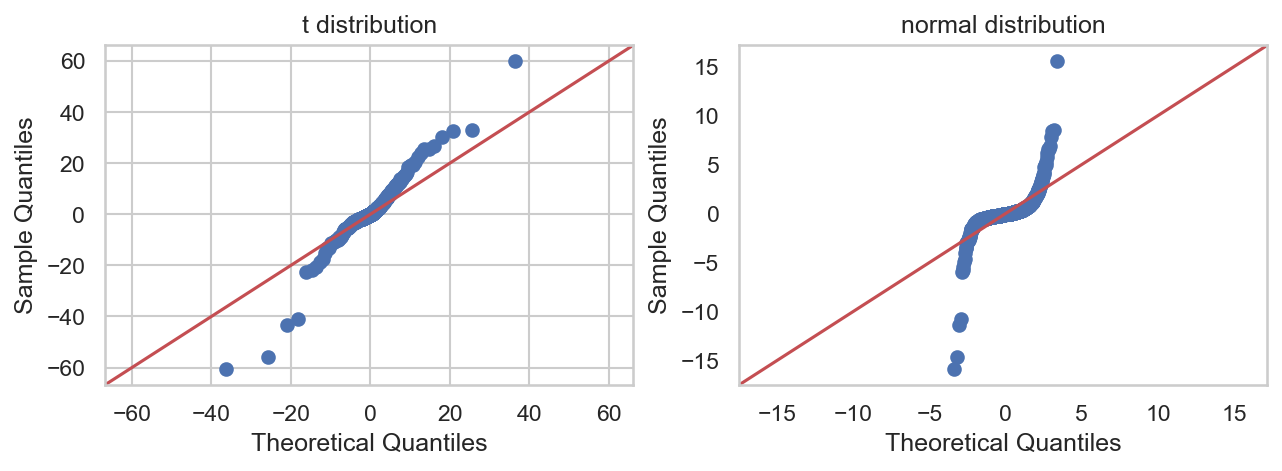

In [54]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))

sm.qqplot(result.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(result.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.grid(None)
plt.show()

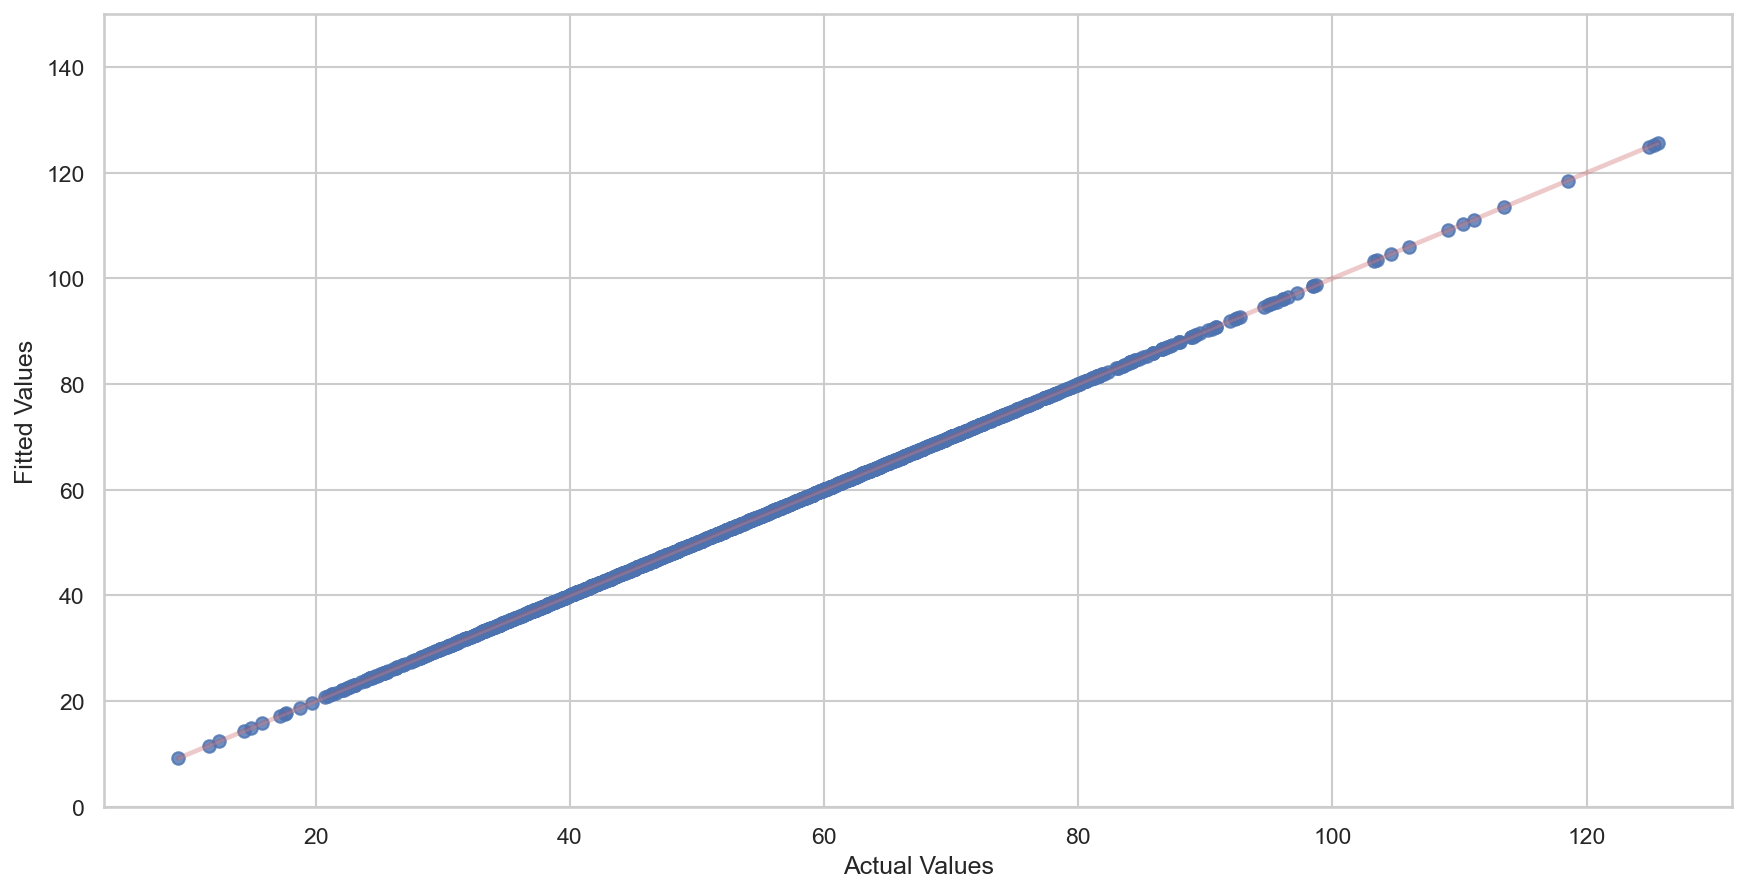

Pearson R:  (1.0, 0.0)


In [55]:
plt.figure(figsize=(14,7))
sns.regplot(y, result.fittedvalues, line_kws={'color':'r', 'alpha':0.3})
plt.ylim(0,150)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(result.fittedvalues, y))